In [1]:
import numpy as np
# from matplotlib import colors, ticker, cm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import time
%matplotlib inline
sns.set_style('ticks');
pal = sns.color_palette('Dark2', n_colors=2, desat=.6)
sns.set_palette(pal)
sns.set_context(context='paper', font_scale=1.5)

179


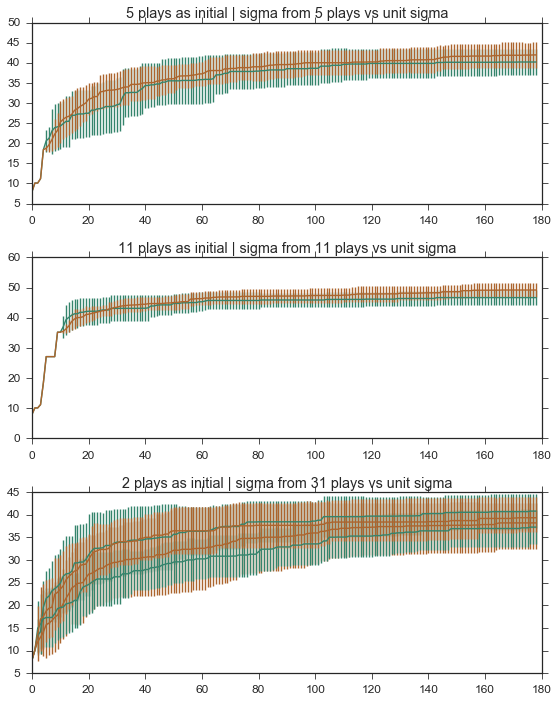

In [4]:
with open('c:\users\p2admin\documents\max\projects\ecoracer2016\player2/simulation_02222017.npy', 'rb') as f:
    maxD = np.load(f)
print len(maxD[2][0])

score_5p = np.array([np.array(maxD[0][j]) for j in range(len(maxD[0]))])
mean_5p = np.mean(score_5p, axis = 0)
std_5p = np.std(score_5p, axis = 0)
score_5u = np.array([np.array(maxD[1][j]) for j in range(len(maxD[1]))])
mean_5u = np.mean(score_5u, axis = 0)
std_5u = np.std(score_5u, axis = 0)

score_11p = np.array([np.array(maxD[2][j]) for j in range(len(maxD[2]))])
mean_11p = np.mean(score_11p, axis = 0)
std_11p = np.std(score_11p, axis = 0)
score_11u = np.array([np.array(maxD[3][j]) for j in range(len(maxD[3]))])
mean_11u = np.mean(score_11u, axis = 0)
std_11u = np.std(score_11u, axis = 0)

score_31p = np.array([np.array(maxD[4][j]) for j in range(len(maxD[4]))])
mean_31p = np.mean(score_31p, axis = 0)
std_31p = np.std(score_31p, axis = 0)
score_31u = np.array([np.array(maxD[5][j]) for j in range(len(maxD[5]))])
mean_31u = np.mean(score_31u, axis = 0)
std_31u = np.std(score_31u, axis = 0)

score_mle = np.array([np.array(maxD[6][j]) for j in range(len(maxD[6]))])
mean_mle = np.mean(score_mle, axis = 0)
std_mle = np.std(score_mle, axis = 0)

score_p3 = np.array([np.array(maxD[7][j]) for j in range(len(maxD[7]))])
mean_p3 = np.mean(score_p3, axis = 0)
std_p3 = np.std(score_p3, axis = 0)

plt.figure(figsize=(8,10))
plt.subplot(3,1,1)
plt.errorbar(range(mean_5p.size), mean_5p, yerr=std_5p)
plt.errorbar(range(mean_5u.size), mean_5u, yerr=std_5u)
plt.title('5 plays as initial | sigma from 5 plays vs unit sigma')

plt.subplot(3,1,2)
plt.errorbar(range(mean_11p.size), mean_11p, yerr=std_11p)
plt.errorbar(range(mean_11u.size), mean_11u, yerr=std_11u)
plt.title('11 plays as initial | sigma from 11 plays vs unit sigma')

plt.subplot(3,1,3)
plt.errorbar(range(mean_31p.size), mean_31p, yerr=std_31p)
plt.errorbar(range(mean_31u.size), mean_31u, yerr=std_31u)
plt.errorbar(range(mean_mle.size), mean_mle, yerr=std_mle)
plt.errorbar(range(mean_p3.size), mean_p3, yerr=std_p3)
plt.title('2 plays as initial | sigma from 31 plays vs unit sigma')



plt.tight_layout()
plt.show()

In [5]:
# opt_sig = pd.read_csv('NEW_sigma_player2.csv')[['trial '+str(i) for i in range(1,11)]]
# score_11p = np.array([np.array(maxD[2][j]) for j in range(len(maxD[2]))])
# print score_11p.shape
# opt_sig = pd.DataFrame(score_11p.T, columns=['trial '+str(i+1) for i in range(20)])

score_31p = np.array([np.array(maxD[4][j]) for j in range(len(maxD[4]))])
# print score_31p.shape
opt_sig = pd.DataFrame(score_31p.T, columns=['trial '+str(i+1) for i in range(20)])


opt_sig.index.name='time'
opt_sig['Play No.']=range(opt_sig.shape[0])
opt_sig = pd.melt(opt_sig, id_vars=['Play No.'], value_name='Best Score')
opt_sig['Kernel Type'] = 'Human' 
opt_sig.head()
print opt_sig['Best Score'].max()

49.2


In [6]:
# unit_sig = pd.read_csv('NEW_unit_sigma_player2.csv')[['trial '+str(i) for i in range(1,11)]]

score_31u = np.array([np.array(maxD[5][j]) for j in range(len(maxD[5]))])
unit_sig = pd.DataFrame(score_31u.T, columns=['trial '+str(i+1) for i in range(20)])

# score_11u = np.array([np.array(maxD[3][j]) for j in range(len(maxD[3]))])
# unit_sig = pd.DataFrame(score_11u.T, columns=['trial '+str(i+1) for i in range(20)])


unit_sig.index.name='time'
unit_sig['Play No.']=range(unit_sig.shape[0])
unit_sig = pd.melt(unit_sig, id_vars=['Play No.'], value_name='Best Score')
unit_sig['Kernel Type'] = 'Unit' 
unit_sig.head()
print unit_sig['Best Score'].max()

46.3


In [7]:
score_mle = np.array([np.array(maxD[6][j]) for j in range(len(maxD[6]))])
mle_sig = pd.DataFrame(score_mle.T, columns=['trial '+str(i+1) for i in range(20)])

# score_11u = np.array([np.array(maxD[3][j]) for j in range(len(maxD[3]))])
# unit_sig = pd.DataFrame(score_11u.T, columns=['trial '+str(i+1) for i in range(20)])


mle_sig.index.name='time'
mle_sig['Play No.']=range(mle_sig.shape[0])
mle_sig = pd.melt(mle_sig, id_vars=['Play No.'], value_name='Best Score')
mle_sig['Kernel Type'] = 'Adaptive' 
mle_sig.head()
print mle_sig['Best Score'].max()

43.6


In [18]:
score_p3 = np.array([np.array(maxD[7][j]) for j in range(len(maxD[7]))])
p3_sig = pd.DataFrame(score_p3.T, columns=['trial '+str(i+1) for i in range(20)])

# score_11u = np.array([np.array(maxD[3][j]) for j in range(len(maxD[3]))])
# unit_sig = pd.DataFrame(score_11u.T, columns=['trial '+str(i+1) for i in range(20)])


p3_sig.index.name='time'
p3_sig['Play No.']=range(p3_sig.shape[0])
p3_sig = pd.melt(p3_sig, id_vars=['Play No.'], value_name='Best Score')
p3_sig['Kernel Type'] = 'P3' 
p3_sig.head()
print p3_sig['Best Score'].max()

44.1


In [13]:
%run 'c:\users\p2admin\documents\max\projects\ecoracer2016/preprocess.py'
pre = Preprocess(all_dat='c:\users\p2admin\documents\max\projects\ecoracer2016/all_games.pkl', pca_model='c:\users\p2admin\documents\max\projects\ecoracer2016\eco_full_pca.pkl')

# pre = Preprocess()
# pre.get_json('alluser_control.json')  # uncomment this to create the pkl file needed!!
# pre.train_pca()

X, y = pre.ready_player_one(2)
X3, y3 = pre.ready_player_one(3)

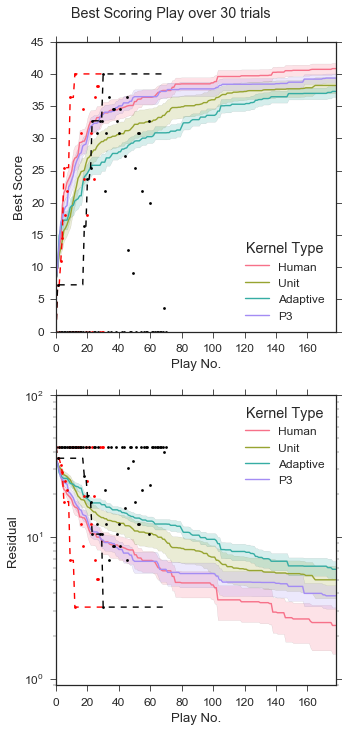

In [22]:
f,ax = plt.subplots(nrows = 2, figsize = (5,10))
sims = pd.concat([opt_sig, unit_sig, mle_sig, p3_sig])
sims['Residual'] = 43.2 - sims['Best Score']

sns.tsplot(sims, time='Play No.', unit='variable', value='Best Score', condition='Kernel Type',
           ci=[68], err_style=['ci_band'], ax=ax[0], estimator=np.mean)
sns.tsplot(sims, time='Play No.', unit='variable', value='Residual', condition='Kernel Type',
           ci=[68], err_style=['ci_band'], ax=ax[1], estimator=np.mean)
ax[1].set_yscale("log", nonposy='clip')
ax[1].set_ylim(.9,100)
f.suptitle('Best Scoring Play over 30 trials', y=1.02)

# print [np.max(y[:i]) for i in range(1,len(y)+1)]
y_res = np.array([np.max(y[:i]) for i in range(1,len(y)+1)])
ax[0].plot(y, 'r.')
ax[0].plot(y_res, 'r--')

ax[1].plot(43.2-y, 'r.')
ax[1].plot(43.2-y_res, 'r--')


y3_res = np.array([np.max(y3[:i]) for i in range(1,len(y3)+1)])
ax[0].plot(y3, 'k.')
ax[0].plot(y3_res, 'k--')

ax[1].plot(43.2-y3, 'k.')
ax[1].plot(43.2-y3_res, 'k--')


# plt.text()
plt.tight_layout()
# sns.tsplot(unit_sig.T.values, color=pal[1], ci=[68], err_style=['ci_band'])

40.9090909091


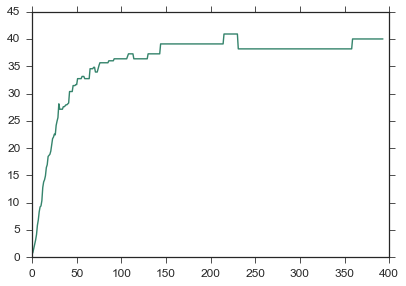

In [5]:
roll_max = lambda y: np.array([np.max(y[:i]) for i in range(1,len(y)+1)])

mult=pd.pivot_table(pre.full_tab, index=['userid','id'])
mult.xs(1)
for i in range(1,213):
# #     mult.xs(i)['Play No.'] = range(len(mult.xs(i)))
    mult.loc[(slice(i,i),slice(None)),'Play No.'] = range(len(mult.loc[(slice(i,i),slice(None)),:]))
    mult.loc[(slice(i,i),slice(None)),'curr_best'] = roll_max(mult.loc[(slice(i,i),slice(None)),'rem_nrg'].values)
    
p_avg = mult.groupby(['Play No.'])['curr_best'].mean().values
p_max = mult.groupby(['Play No.'])['curr_best'].mean().values

plt.plot(p_avg)
mult.reset_index(inplace=True)  # remove multiindex
print p_avg.max()

In [6]:
import scikits.bootstrap as boot  
lo_hi = np.zeros((201,2))
for i in range(201):
     lo_hi[i] = boot.ci(mult[mult['Play No.']==i]['curr_best'].values, np.mean, alpha=.32)
lo_hi

array([[  0.31555222,   0.90157776],
       [  0.63006301,   1.26012601],
       [  1.23301985,   2.17345873],
       [  1.93624557,   3.16410862],
       [  2.51556663,   3.88542964],
       [  3.35664336,   5.11888112],
       [  4.86902928,   6.9953775 ],
       [  5.66433566,   8.14685315],
       [  7.05009276,   9.68460111],
       [  7.82608696,  10.67193676],
       [  8.05194805,  11.03896104],
       [  8.95454545,  12.04545455],
       [ 11.16883117,  14.44155844],
       [ 12.0855615 ,  15.61497326],
       [ 12.4340176 ,  16.24633431],
       [ 12.9153605 ,  16.99059561],
       [ 14.48051948,  18.37662338],
       [ 15.        ,  18.83116883],
       [ 16.71328671,  20.27972028],
       [ 16.85314685,  20.41958042],
       [ 16.74242424,  20.75757576],
       [ 17.39130435,  21.50197628],
       [ 18.59504132,  22.47933884],
       [ 19.63636364,  24.        ],
       [ 19.71291866,  24.21052632],
       [ 20.        ,  24.9197861 ],
       [ 19.63636364,  25.09090909],
 

(201L,)


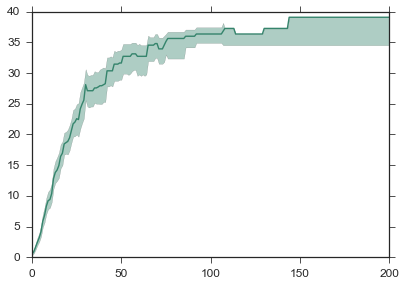

In [7]:
# mult.reset_index(inplace=True)
mult.groupby('Play No.')['curr_best'].std().loc[:200]
p_avg = mult[mult['Play No.']<=200.].groupby('Play No.')['curr_best'].mean()
p_std = mult[mult['Play No.']<=200.].groupby('Play No.')['curr_best'].std()
plt.plot(p_avg)
print p_avg.shape
plt.fill_between(range(201), lo_hi[:,0],lo_hi[:,1], alpha=.4)
# sns.tsplot(mult[mult['Play No.']<=200.], time='Play No.', unit='userid', value='curr_best',
#            ci=[68], err_style=['ci_band'], legend=False, estimator=np.mean)

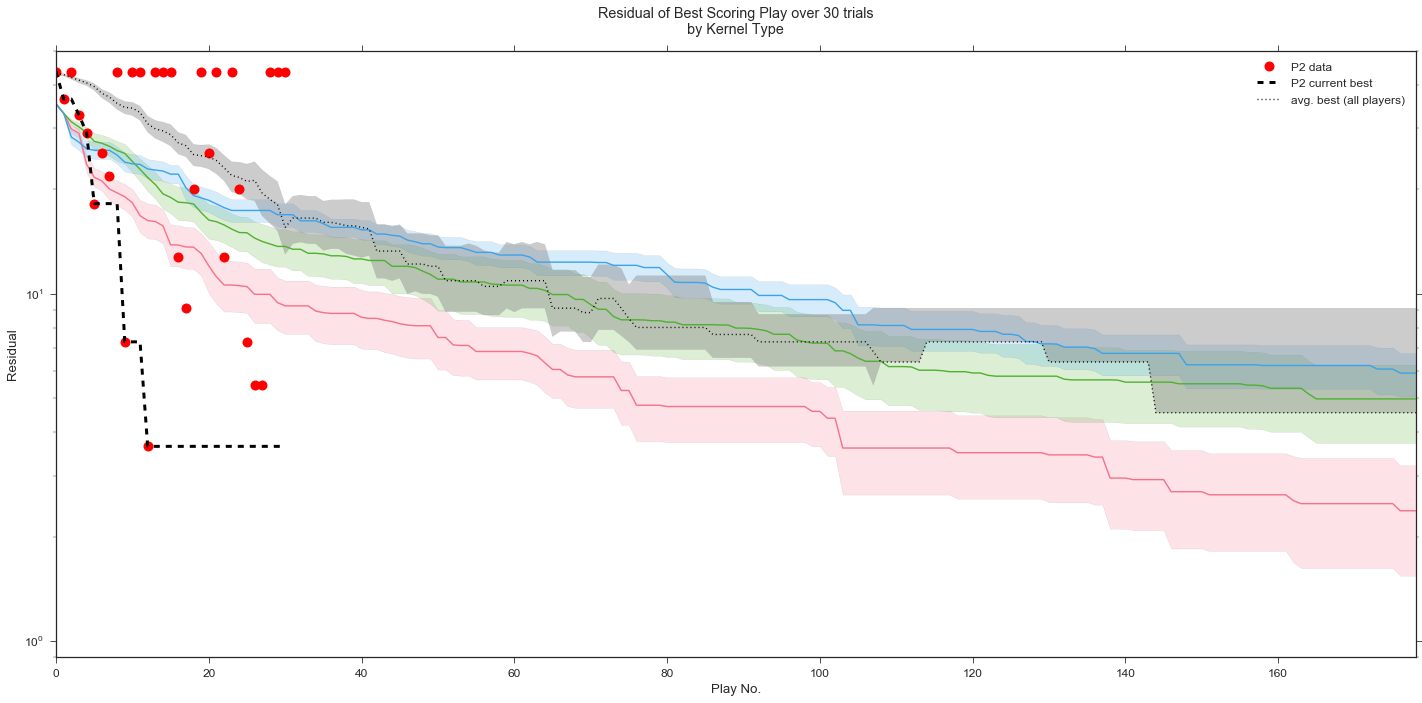

In [32]:
plt.figure(figsize=(20,10))
sns.tsplot(sims, time='Play No.', unit='variable', value='Residual', condition='Kernel Type',
           ci=[68], err_style=['ci_band'], legend=False, estimator=np.mean)
plt.semilogy(43.64-y, 'r.', label='P2 data', markersize=20)
plt.plot(43.64-y_res, 'k--', label='P2 current best', linewidth = 3)

plt.plot(43.64-p_avg, 'k:', label='avg. best (all players)')
plt.fill_between(range(201), 43.64-lo_hi[:,0],43.64-lo_hi[:,1], alpha=.4, color='gray')

plt.title('Residual of Best Scoring Play over 30 trials\nby Kernel Type', y=1.02)
# plt.yscale('log')
plt.ylim(.9,50)
# plt.text(205,1.3,'Human $\Lambda^*$')
# plt.text(205,4,'Unit $\Lambda_I$')
plt.legend()
plt.tight_layout()